# Detection Of Phishing Website Using Machine Learning

# 1. Objective

Phishing is a method of trying to gather personal information using deceptive e-mails and websites.
Phishing is a type of social engineering where an attacker sends a fraudulent (e.g., spoofed, fake, or otherwise deceptive) message designed to trick a person into revealing sensitive information to the attacker or to deploy malicious software on the victim's infrastructure like ransomware.
### The objective of this project is to train machine learning models and deep neural networks on the dataset created to predict phishing websites. Both phishing and legitimate URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measured and compared.

##  The Result will be determined by the two values [1, -1] where 1 represent the legitimate and -1 represents phishing.

## 2. Loading Dataset[Training and Testing ]

### The features are extracted and saved as a csv file. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
traindata=pd.read_csv("Phising_Training_Dataset.csv")
traindata.sample(15)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
1274,13618,1,-1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,0,0,-1,-1,1,0,1,1,-1,1,1,-1,1,-1,1,1,1,1
478,12822,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,-1
3921,16265,1,-1,1,1,1,-1,0,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,1,-1,-1,1,0,1,-1
4845,17189,1,1,-1,-1,-1,1,0,-1,-1,1,1,-1,1,1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,1,1,1
3165,15509,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,-1,1,1,0,1,1,1,1,1,-1,1,-1,1,0,1,1
3933,16277,1,-1,1,1,1,-1,-1,1,-1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1,-1
2419,14763,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
8571,20915,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,1
7625,19969,-1,-1,1,1,1,-1,-1,0,1,1,1,1,-1,-1,0,1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,-1
5606,17950,-1,-1,-1,1,-1,1,1,1,1,1,1,-1,-1,1,1,-1,1,-1,0,1,1,1,1,-1,-1,1,-1,-1,1,1,1


In [5]:
testdata =pd.read_csv("Phising_Testing_Dataset.csv")
testdata.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,1,1,1,1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,-1,-1,1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1


## 3. Familiarizing with Data
#### In this step, few dataframe methods are used to look into the data and its features.

In [7]:
#Checking The Shape Of Dataset
print(traindata.shape)
print(testdata.shape)

(8955, 32)
(2100, 31)


In [10]:
#Listing The Feature Of Dataset
print(traindata.columns)

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [17]:
#Full Information Of Dataset
float_cols = traindata.select_dtypes('float64').columns
for c in float_cols:
    traindata[c] = traindata[c].astype('float32')
    
int_cols = traindata.select_dtypes('int64').columns
for c in int_cols:
    traindata[c] = traindata[c].astype('int32')
    
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int32
 1   having_IP                    8955 non-null   int32
 2   URL_Length                   8955 non-null   int32
 3   Shortining_Service           8955 non-null   int32
 4   having_At_Symbol             8955 non-null   int32
 5   double_slash_redirecting     8955 non-null   int32
 6   Prefix_Suffix                8955 non-null   int32
 7   having_Sub_Domain            8955 non-null   int32
 8   SSLfinal_State               8955 non-null   int32
 9   Domain_registeration_length  8955 non-null   int32
 10  Favicon                      8955 non-null   int32
 11  port                         8955 non-null   int32
 12  HTTPS_token                  8955 non-null   int32
 13  Request_URL                  8955 non-null   int

## 4. Visualizing the data
#### Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

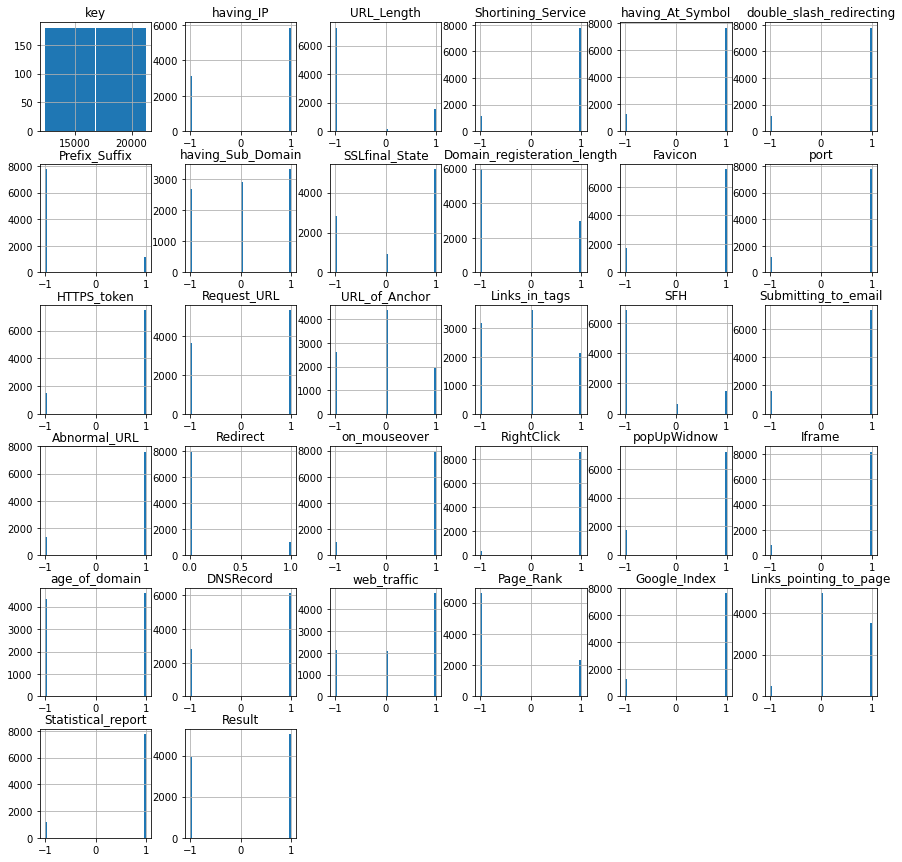

In [19]:
#Plotting the data distribution
traindata.hist(bins = 50,figsize = (15,15))
plt.show()

#### Balance/Imbalanced Data
##### The data is balanced for non-phising and phising label

<AxesSubplot:>

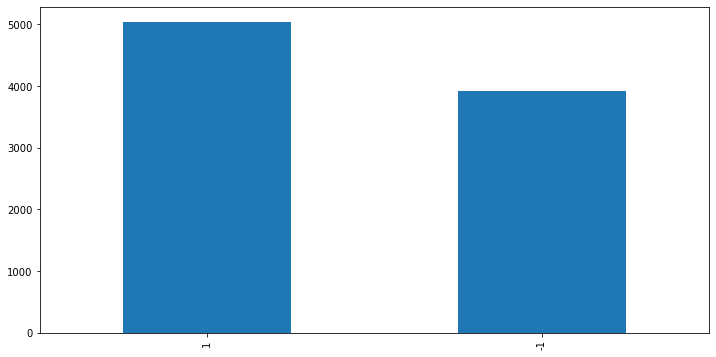

In [21]:
#checking Imbalance in dataset
traindata['Result'].value_counts().plot(kind='bar')

### Spearman Correlation
#### By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [22]:
def corr_heatmap(data, idx_s, idx_e):
    y = traindata['Result']
    temp = traindata.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['Result'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

<ipython-input-22-84259749e66a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


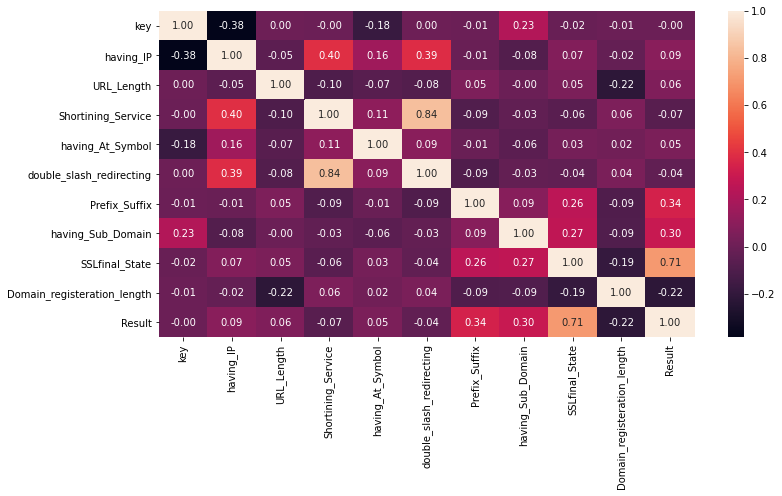

In [23]:
corr_heatmap(data, 0, 10)

<ipython-input-22-84259749e66a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


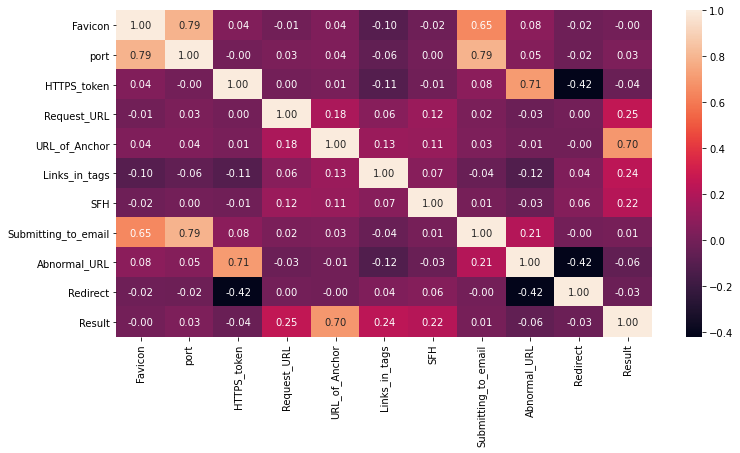

In [24]:
corr_heatmap(data, 10, 20)

<ipython-input-22-84259749e66a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Result'] = y


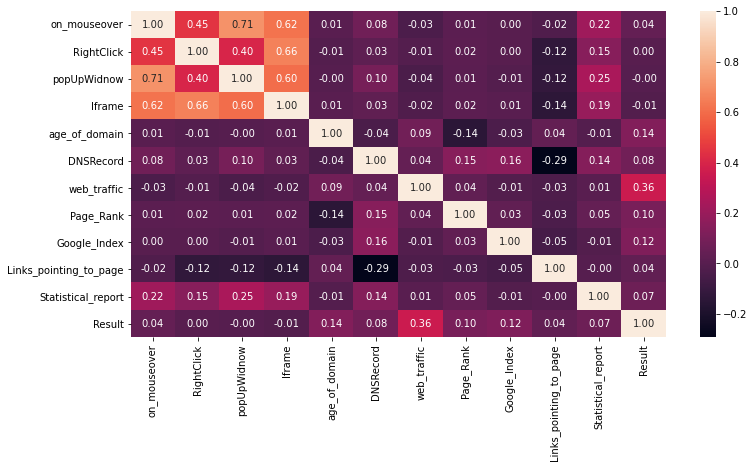

In [25]:
corr_heatmap(data, 20, 31)

## 5. Data Preprocessing & EDA
#### Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

#### Summary Statistics
#### By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges

In [12]:
traindata.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,0.623227,0.735343,0.666108,0.191066,-0.076717,-0.118816,-0.595087,0.633054,0.702289,0.113903,0.771301,0.920045,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,0.782084,0.677733,0.745897,0.981632,0.710203,0.761743,0.757789,0.774151,0.711931,0.317711,0.636506,0.391835,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The above obtained result shows that the most of the data is made of 0's ,1's and -1's except key  columns. The key column doesn't have any significance to the machine learning model training. So dropping the 'key' column from the dataset.

In [27]:
#checking the dataset for null values
traindata.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

#### Splitting the Data

In [29]:
# Sepratating & assigning features and target columns to X & y
X = traindata.drop(['key', 'Result'], axis=1) # independent variable
y = traindata['Result'] #target variable

### Mutual Info
#### We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [31]:
from sklearn.feature_selection import mutual_info_classif
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

SSLfinal_State                 0.343405
URL_of_Anchor                  0.333996
Prefix_Suffix                  0.084016
web_traffic                    0.083597
having_Sub_Domain              0.076922
Request_URL                    0.032555
Links_in_tags                  0.030083
SFH                            0.025282
Domain_registeration_length    0.024174
age_of_domain                  0.009163
Google_Index                   0.007371
Page_Rank                      0.005369
having_IP                      0.004408
Links_pointing_to_page         0.003477
DNSRecord                      0.003344
URL_Length                     0.002754
Statistical_report             0.002295
Shortining_Service             0.002226
Abnormal_URL                   0.001815
having_At_Symbol               0.001244
on_mouseover                   0.000884
double_slash_redirecting       0.000719
HTTPS_token                    0.000673
port                           0.000574
Redirect                       0.000368


#### Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

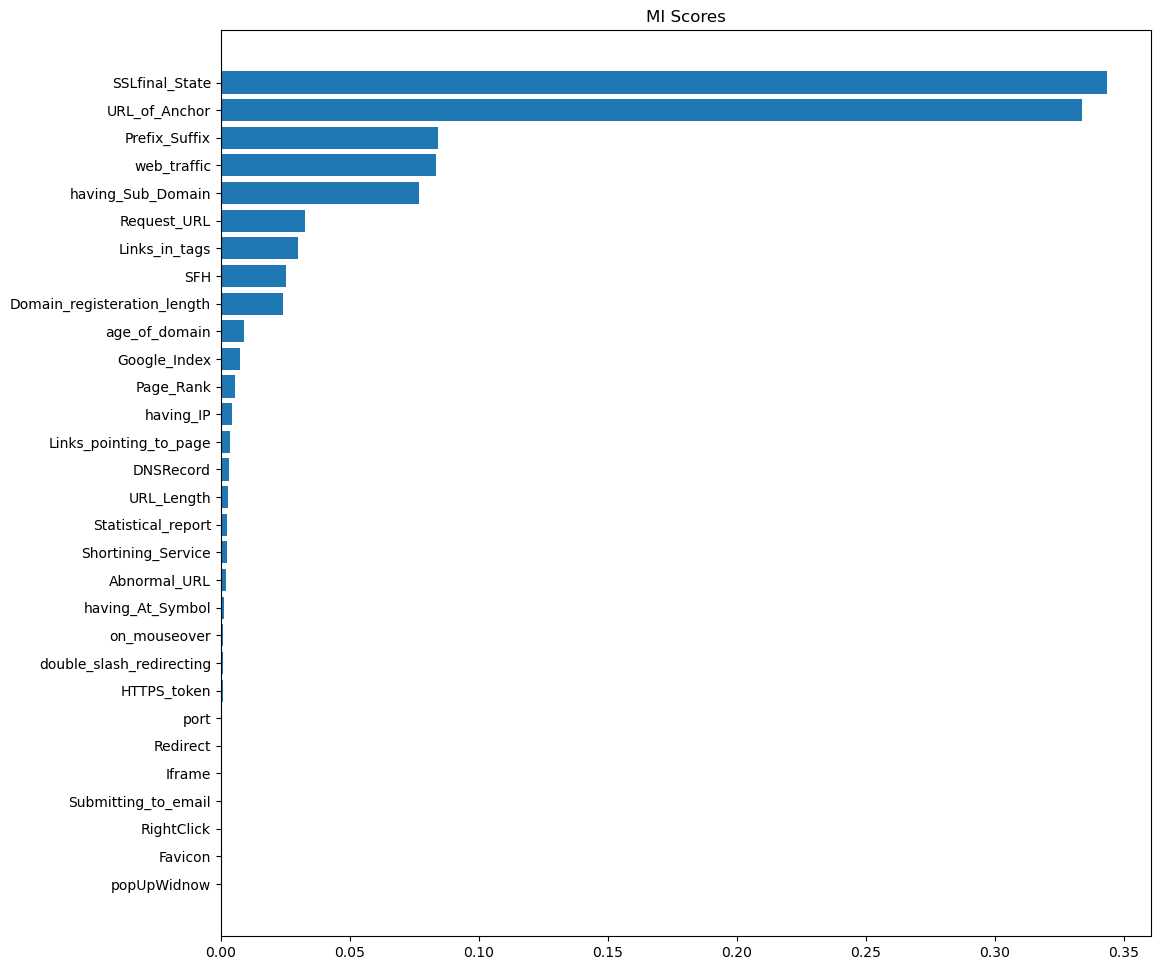

In [32]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [33]:
# Checking the shape for X, y variable 
X.shape, y.shape

((8955, 30), (8955,))

## 6. Machine Learning Models & Training
### From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

#### The dataset comes under Multi-Class classification problem, as the input URL is classified as phishing (-1) or legitimate (1). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

#### Logistic Regression 
#### Decision Tree
#### Random Forest
#### Multilayer Perceptrons
#### XGBoost Classifier
#### Autoencoder Neural Network
####  Support Vector Machines

In [35]:
#importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as cuRfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 12,shuffle=True)
X_train.shape, X_test.shape

((7164, 30), (1791, 30))

In [37]:
# Creating holders to store the model performance results
ML_Model = []
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []


#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    accuracy_train.append(round(a, 3))
    accuracy_test.append(round(b, 3))
    precision_train.append(round(a, 3))
    precision_test.append(round(b, 3))
    recall_train.append(round(a, 3))
    recall_test.append(round(b, 3))
    f1_train.append(round(a, 3))
    f1_test.append(round(b, 3))

## 6.1 Logistic Regression  Classifier

In [57]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr.score(X_test,y_test)
    

0.9240647682858738

In [78]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{-1: 1.145873320537428, 1: 0.8870728083209509}

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{-1: 1.145873320537428, 1: 0.8870728083209509}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score:  0.9274172829591395
Best Params:  {'C': 0.1, 'class_weight': {-1: 1.145873320537428, 1: 0.8870728083209509}, 'penalty': 'l1', 'solver': 'saga'}


In [80]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['Result']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    lr = LogisticRegression(max_iter=10000,
                           C=0.1,
                           class_weight=[{-1: 1.145873320537428, 1: 0.8870728083209509}],
                           penalty='l1',
                           solver='saga')
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [81]:
arr = []
for i in range(20,31,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9317307692307693, recall : 0.9462890625, f1 score : 0.938953488372093, accuracy : 0.9296482412060302
Performance for Logistic Model with Top 21 features is precision : 0.9161041465766635, recall : 0.9433962264150944, f1 score : 0.9295499021526419, accuracy : 0.9195979899497487
Performance for Logistic Model with Top 22 features is precision : 0.9128787878787878, recall : 0.9572989076464746, f1 score : 0.9345613184682501, accuracy : 0.9246231155778895
Performance for Logistic Model with Top 23 features is precision : 0.9344262295081968, recall : 0.9462890625, f1 score : 0.9403202328966522, accuracy : 0.931323283082077
Performance for Logistic Model with Top 24 features is precision : 0.9304347826086956, recall : 0.9431929480901078, f1 score : 0.9367704280155643, accuracy : 0.9274148520379676
Performance for Logistic Model with Top 25 features is precision : 0.9299065420560748, recall : 0.9485224022878932, f1 score : 0.

In [82]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.931731,0.946289,0.938953,0.929648
1,21,0.916104,0.943396,0.929550,0.919598
2,22,0.912879,0.957299,0.934561,0.924623
3,23,0.934426,0.946289,0.940320,0.931323
4,24,0.930435,0.943193,0.936770,0.927415
5,25,0.929907,0.948522,0.939122,0.927973
6,26,0.923450,0.951098,0.937070,0.928532
7,27,0.924370,0.953757,0.938834,0.927973
8,28,0.930776,0.959499,0.944919,0.935232
9,29,0.913378,0.944279,0.928571,0.918481


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

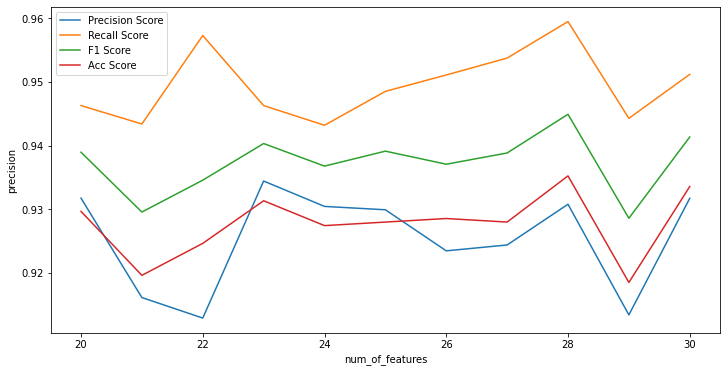

In [83]:
sns.lineplot(x='num_of_features', y='precision',data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.89      0.91       795
           1       0.91      0.95      0.93       996

    accuracy                           0.92      1791
   macro avg       0.93      0.92      0.92      1791
weighted avg       0.92      0.92      0.92      1791



In [90]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)


0.9547738693467337